In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [73]:
df=pd.read_csv("fake_bills.csv",delimiter=';')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [74]:
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric NaN with median
df.fillna("Unknown", inplace=True)  # Fill categorical NaN with 'Unknown'

# 3. Remove Special Characters in Columns
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# 4. Handling Categorical Data
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [76]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.481627,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.656137,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.030000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [77]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.duplicated().sum()

0

In [82]:
x=df.drop('is_genuine',axis=1)
y=df['is_genuine']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [83]:
k_values=[1,3,5,7,9,11,13,15,17,19,21]
def evaluate_k(kvalue):
    acc=[]
    for k in kvalue:
        model=KNeighborsClassifier(n_neighbors=k)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        acc.append(accuracy_score(ytest,ypred))
    return acc
acc=evaluate_k(k_values)

best_k=k_values[np.argmax(acc)]
print(acc)
print(best_k)

[0.98, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667]
9


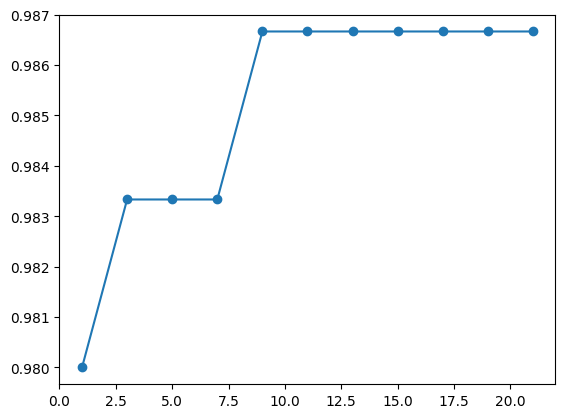

In [84]:
plt.plot(k_values,acc,marker='o')
plt.show()

In [85]:
distance=['euclidean','manhattan','chebyshev']
dacc=[]
for metric in distance:
    model=KNeighborsClassifier(n_neighbors=best_k,metric=metric)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    dacc.append(accuracy_score(ytest,ypred))
dacc

[0.9866666666666667, 0.9833333333333333, 0.98]

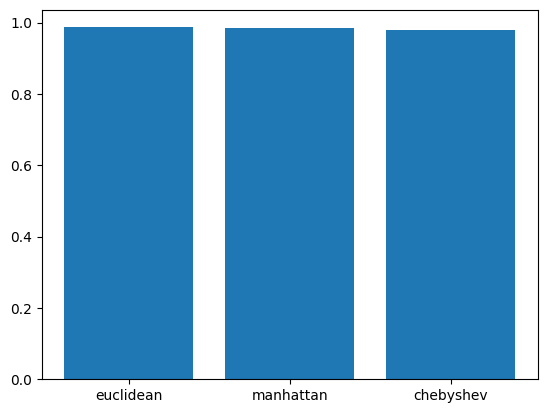

In [86]:
plt.bar(distance,dacc)
plt.show()

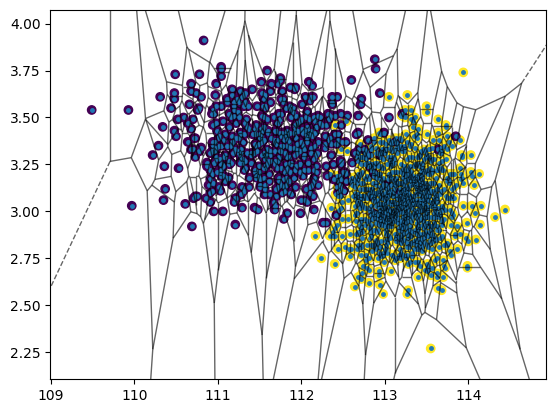

In [87]:

x_viz=x[['length','margin_up']]
knn=KNeighborsClassifier(n_neighbors=5)
from scipy.spatial import Voronoi, voronoi_plot_2d
knn.fit(x_viz,y)

vor=Voronoi(x_viz)
voro=voronoi_plot_2d(vor,show_vertices=False,line_width=1,line_color='orange',line_alpha=0.6,point_size=5)
plt.scatter(x_viz['length'],x_viz['margin_up'],c=y,cmap='viridis')
plt.show()

In [71]:
df.columns

Index(['capdiameter', 'capshape', 'gillattachment', 'gillcolor', 'stemheight',
       'stemwidth', 'stemcolor', 'season', 'class'],
      dtype='object')